In [91]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def get_historic_price(symbol, exchange='coinbase', after='2018-01-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

last_week = (pd.Timestamp.now() - pd.offsets.Day(21))
last_week

coin='eth'
coin_kraken = get_historic_price(coin, 'kraken', after=last_week)
coin_coinbase = get_historic_price(coin, 'coinbase', after=last_week)
coin_hitbtc = get_historic_price(coin, 'hitbtc', after=last_week)
coin_bittrex = get_historic_price(coin, 'bittrex', after=last_week)
coin_bitbay = get_historic_price(coin, 'bitbay', after=last_week)

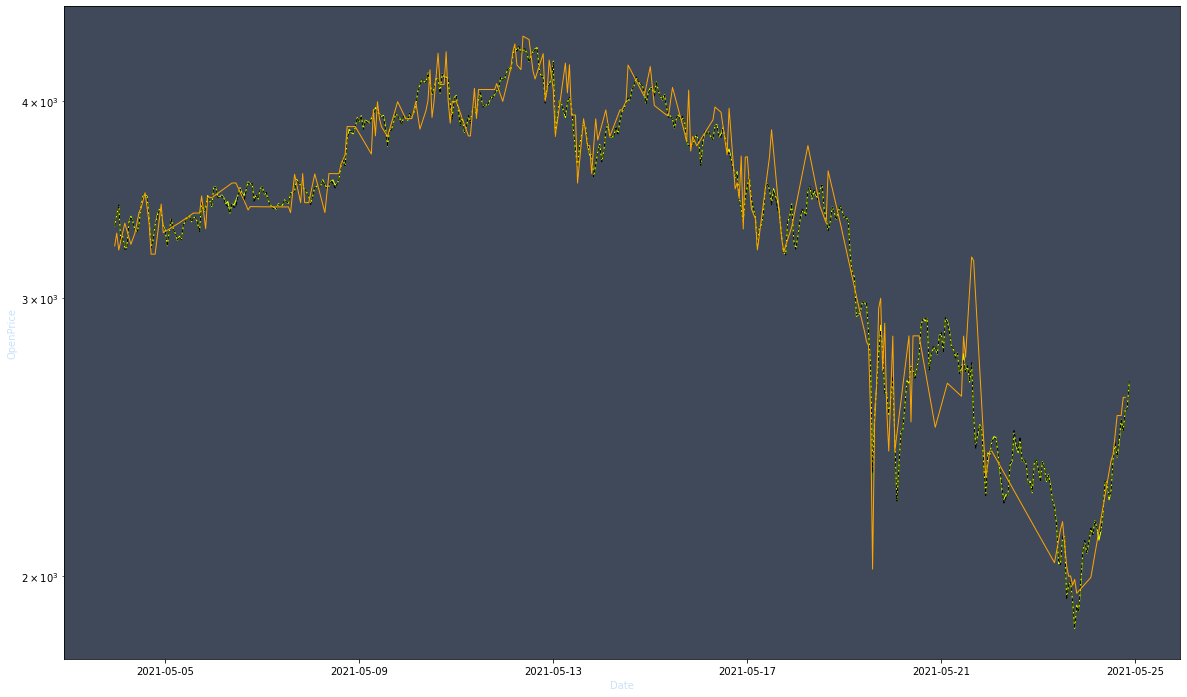

In [126]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xlabel('Date',size=10, color="#C9E2FA")  
ax.set_ylabel('OpenPrice',size=10, color="#C9E2FA")
ax.set_facecolor("#3F495A")
plt.rcParams["figure.figsize"] = (20,12)

plt.plot(coin_kraken.OpenPrice, color='green', linewidth=1)
plt.plot(coin_coinbase.OpenPrice, color='yellow', linewidth=1)
plt.plot(coin_hitbtc.OpenPrice, color='white', linewidth=1)
plt.plot(coin_bittrex.OpenPrice, color='black', linewidth=1, linestyle='dashed')
plt.plot(coin_bitbay.OpenPrice, color='orange', linewidth=1)

<AxesSubplot:xlabel='CloseTime', ylabel='Price Difference'>

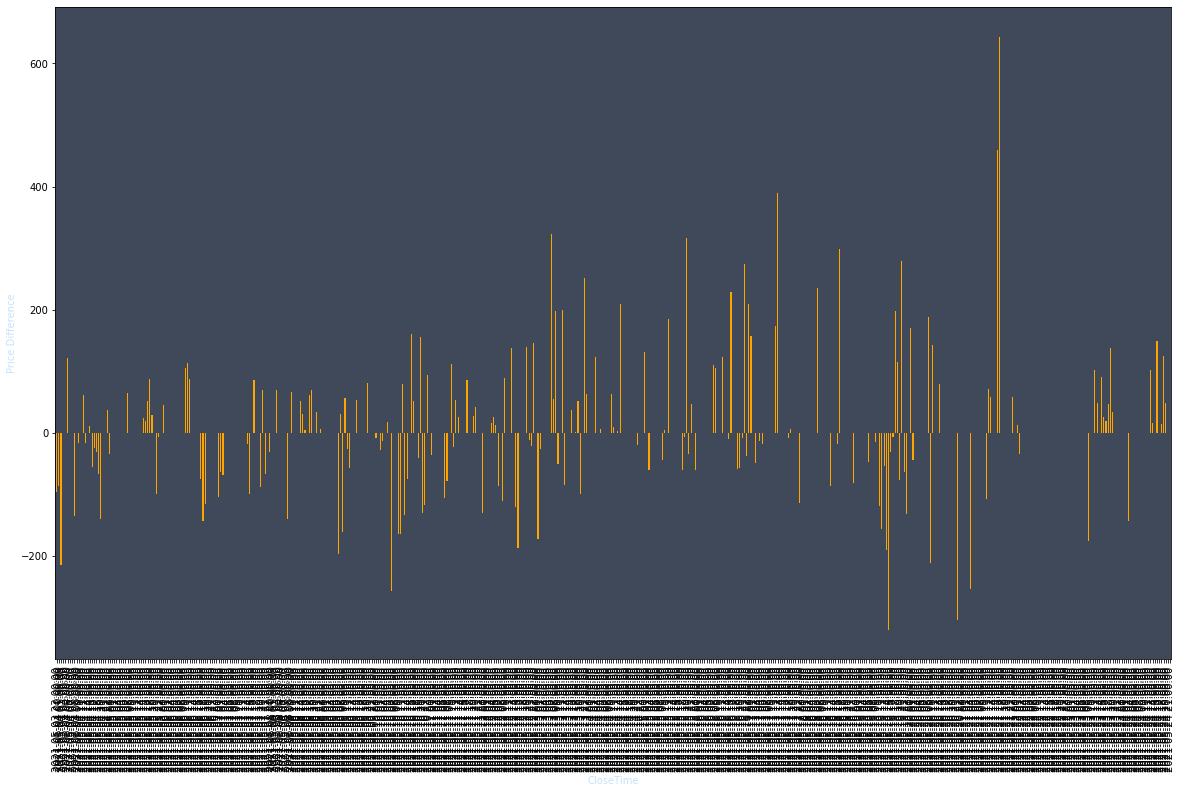

In [127]:
fig, ax = plt.subplots()
ax.set_xlabel('Date',size=10, color="#C9E2FA")  
ax.set_ylabel('Price Difference',size=10, color="#C9E2FA")
ax.set_facecolor("#3F495A")
plt.rcParams["figure.figsize"] = (20,6)
coin_diff= (coin_bitbay.OpenPrice-coin_coinbase.OpenPrice).copy()
coin_diff.plot(kind='bar', color='orange')